In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dat.csv',delimiter='\s+')

In [3]:
df.tail()

,year,apt1,apt2,rent1,rent2,cash,taxapt1,taxapt2,asset
78,201807,887000,984400,2371,1730,581284,0,0.0,2452684.0
79,201808,887000,961100,2371,1730,585385,0,0.0,2433485.0
80,201809,887500,1100000,2371,1730,589486,0,0.0,2576986.0
81,201810,887500,952700,2371,1730,593587,0,0.0,2433787.0
82,201811,880600,952900,2371,1730,597688,0,0.0,2431188.0


In [4]:
ma6_apt1 = df['apt1'].rolling(window=6).mean()
ma6_apt2 = df['apt2'].rolling(window=6).mean()

In [5]:
idx = pd.date_range(start='1/2012', end='11/2018',freq='MS')

C:\Users\ico10\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


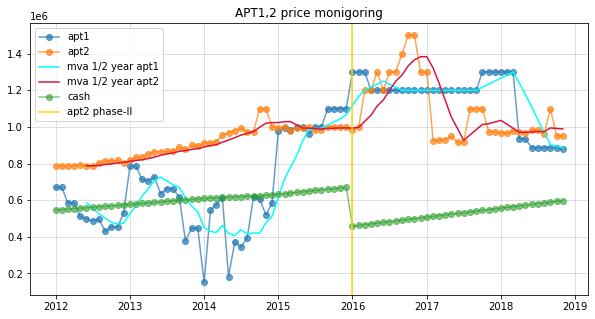

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(idx,df['apt1'],'o-',alpha=0.7,label='apt1')
plt.plot(idx,df['apt2'],'o-',alpha=0.7,label='apt2')
plt.plot(idx,ma6_apt1,color='cyan',label='mva 1/2 year apt1')
plt.plot(idx,ma6_apt2,color='crimson',label='mva 1/2 year apt2')
plt.plot(idx,df['cash'],'-o',alpha=0.6,label='cash')
plt.axvline(x='2016-1',color='gold',label='apt2 phase-II')
plt.title('APT1,2 price monigoring')
plt.legend()
#plt.yscale('log')
plt.grid(alpha=0.5)
plt.show()

In [7]:
return_apt1 = df['apt1'].pct_change()
return_apt2 = df['apt2'].pct_change()
return_cash = df['cash'].pct_change()
return_asset = df['asset'].pct_change()

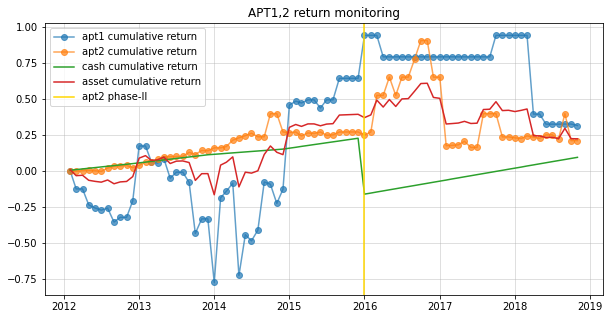

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(idx,(1+return_apt1).cumprod()-1,'o-',alpha=0.7,label='apt1 cumulative return')
plt.plot(idx,(1+return_apt2).cumprod()-1,'o-',alpha=0.7,label='apt2 cumulative return')
plt.plot(idx,(1+return_cash).cumprod()-1,label='cash cumulative return')
plt.plot(idx,(1+return_asset).cumprod()-1,label='asset cumulative return')
plt.axvline(x='2016-1',color='gold',label='apt2 phase-II')
plt.title('APT1,2 return monitoring')
plt.legend()
#plt.yscale('log')
plt.grid(alpha=0.5)
plt.show()

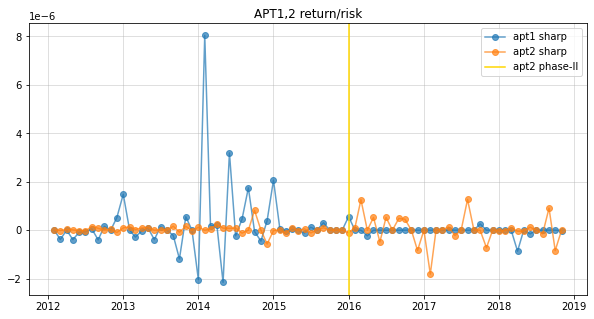

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(idx,return_apt1/df['apt1'].std(),'o-',alpha=0.7,label='apt1 sharp')
plt.plot(idx,return_apt2/df['apt2'].std(),'o-',alpha=0.7,label='apt2 sharp')
plt.axvline(x='2016-1',color='gold',label='apt2 phase-II')
plt.title('APT1,2 return/risk')
plt.legend()
#plt.yscale('log')
plt.grid(alpha=0.5)
plt.show()

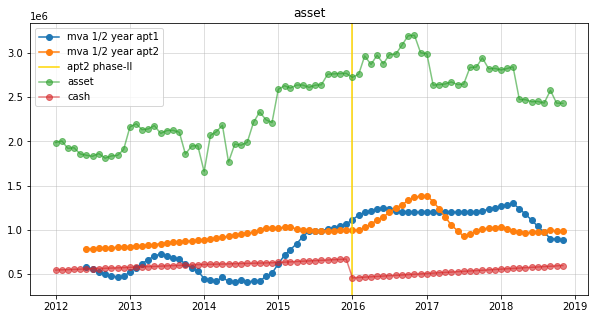

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(idx,ma6_apt1,'-o',label='mva 1/2 year apt1')
plt.plot(idx,ma6_apt2,'-o',label='mva 1/2 year apt2')
plt.axvline(x='2016-1',color='gold',label='apt2 phase-II')
plt.plot(idx,df['asset'],'-o',alpha=0.6,label='asset')
plt.plot(idx,df['cash'],'-o',alpha=0.6,label='cash')
plt.title('asset')
plt.legend()
#plt.yscale('log')
plt.grid(alpha=0.5)
plt.show()